In [1]:
'''Volatility Breakthrough Strategy-larry williams
buy : starting price + previous day's fluctuation range * 0.5 
sell : the closing price of the day. 

investment target : KODEX kosdaq150(ticker : 229200)
+ previous day's fluctuation range : (previous day's)closing price- starting price
'''
import pandas as pd
data=['data/kodex kosdaq1.xlsx','data/kodex kosdaq2.xlsx','data/kodex kosdaq3.xlsx','data/kodex kosdaq4.xlsx']
kosdaq=[]

for i in data:
    tem=pd.read_excel(i, parse_dates=['일자'], index_col="일자")
    kosdaq.append(tem)
df=pd.concat(kosdaq)
df=df.sort_index()
df=df.rename_axis('date')
df=df[['시가','고가','저가','종가','거래량']]
df.columns=['starting price','high price','low price','closing price','volume']
df.head()

E:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
E:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
E:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
E:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,starting price,high price,low price,closing price,volume
date,,,,,
2015-10-01,10830,10830,10760,10760,30032
2015-10-02,10800,10825,10800,10810,60029
2015-10-05,10930,10940,10880,10900,40976
2015-10-06,10920,10950,10840,10840,40252
2015-10-07,10760,10760,10600,10600,20248


In [2]:
df['volatility']=df['high price']-df['low price']
df.head()

,starting price,high price,low price,closing price,volume,volatility
date,,,,,,
2015-10-01,10830,10830,10760,10760,30032,70
2015-10-02,10800,10825,10800,10810,60029,25
2015-10-05,10930,10940,10880,10900,40976,60
2015-10-06,10920,10950,10840,10840,40252,110
2015-10-07,10760,10760,10600,10600,20248,160


In [3]:
df['previous price']=df['volatility'].shift(1)
df.head()

,starting price,high price,low price,closing price,volume,volatility,previous price
date,,,,,,,
2015-10-01,10830,10830,10760,10760,30032,70,NaN
2015-10-02,10800,10825,10800,10810,60029,25,70.0
2015-10-05,10930,10940,10880,10900,40976,60,25.0
2015-10-06,10920,10950,10840,10840,40252,110,60.0
2015-10-07,10760,10760,10600,10600,20248,160,110.0


In [4]:
df['target price']=df['starting price']+df['previous price']*0.5
df.head()

,starting price,high price,low price,closing price,volume,volatility,previous price,target price
date,,,,,,,,
2015-10-01,10830,10830,10760,10760,30032,70,NaN,NaN
2015-10-02,10800,10825,10800,10810,60029,25,70.0,10835.0
2015-10-05,10930,10940,10880,10900,40976,60,25.0,10942.5
2015-10-06,10920,10950,10840,10840,40252,110,60.0,10950.0
2015-10-07,10760,10760,10600,10600,20248,160,110.0,10815.0


In [5]:
import numpy as np

'''The first argument of np.where() specifies the condition, 
the second argument df['closing price'] / df['target price'] is the value 
to be returned if the condition is True, 
and the third argument 1 is the value to be returned 
if the condition is False.'''
df['Return']=np.where(df['high price']>=df['target price'],df['closing price']/df['target price'],1)
df.head()

,starting price,high price,low price,closing price,volume,volatility,previous price,target price,Return
date,,,,,,,,,
2015-10-01,10830,10830,10760,10760,30032,70,NaN,NaN,1.000000
2015-10-02,10800,10825,10800,10810,60029,25,70.0,10835.0,1.000000
2015-10-05,10930,10940,10880,10900,40976,60,25.0,10942.5,1.000000
2015-10-06,10920,10950,10840,10840,40252,110,60.0,10950.0,0.989954
2015-10-07,10760,10760,10600,10600,20248,160,110.0,10815.0,1.000000


In [6]:
'''df['Return'].cumprod() calculates the cumulative product 
of the values in the 'Return' column of the DataFrame df'''
df['cumulative return']=df['Return'].cumprod()

df.tail()

,starting price,high price,low price,closing price,volume,volatility,previous price,target price,Return,cumulative return
date,,,,,,,,,,
2023-07-20,14535,14900,14440,14855,8076954,460,415.0,14742.5,1.007631,2.230815
2023-07-21,14535,15090,14515,14985,7315589,575,460.0,14765.0,1.014900,2.264055
2023-07-24,14985,15190,14885,15150,9202585,305,575.0,15272.5,1.000000,2.264055
2023-07-25,15150,15770,15020,15625,8226584,750,305.0,15302.5,1.021075,2.311770
2023-07-26,15730,16615,14755,14995,14440819,1860,750.0,16105.0,0.931077,2.152436


In [7]:
delta=df.index[-1]-df.index[0]
year=delta.days/365
CAGR=df['cumulative return'].iloc[-1]**(1/year)-1
print(CAGR*100)

10.29701783648762


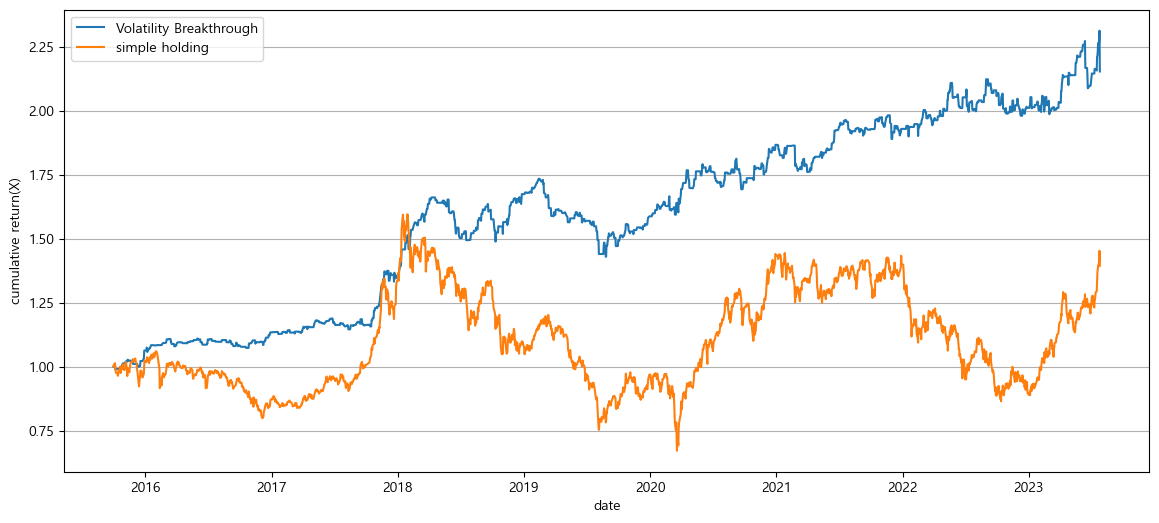

In [8]:
import matplotlib.pyplot as plt
import platform

if platform.system()=='Darwin':
    plt.rc('font',family='AppleGothic')
else:
    plt.rc('font',family='Malgun Gothic')
fig=plt.figure(figsize=(14,6))
'''fig.add_subplot(a, b, c)
a: The number of rows in the subplot grid.
b: The number of columns in the subplot grid.
c: The index of the subplot you want to create. '''
ax=fig.add_subplot(1,1,1)
ax.plot(df['cumulative return'],label="Volatility Breakthrough")
ax.plot(df['closing price']/df['closing price'].iloc[0], label="simple holding")

plt.xlabel('date')
plt.ylabel('cumulative return(X)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [9]:
df['previous high']=df['cumulative return'].cummax()
# Drawdown = (Trough Value - Peak Value) / Peak Value
df['DD']=(df['cumulative return']-df['previous high'])/df['previous high']*100
df.tail()

,starting price,high price,low price,closing price,volume,volatility,previous price,target price,Return,cumulative return,previous high,DD
date,,,,,,,,,,,,
2023-07-20,14535,14900,14440,14855,8076954,460,415.0,14742.5,1.007631,2.230815,2.271488,-1.790553
2023-07-21,14535,15090,14515,14985,7315589,575,460.0,14765.0,1.014900,2.264055,2.271488,-0.327222
2023-07-24,14985,15190,14885,15150,9202585,305,575.0,15272.5,1.000000,2.264055,2.271488,-0.327222
2023-07-25,15150,15770,15020,15625,8226584,750,305.0,15302.5,1.021075,2.311770,2.311770,0.000000
2023-07-26,15730,16615,14755,14995,14440819,1860,750.0,16105.0,0.931077,2.152436,2.311770,-6.892269


In [10]:
# Maximum Drawdown if VB st
df['DD'].min()

-17.5738435368285

E:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


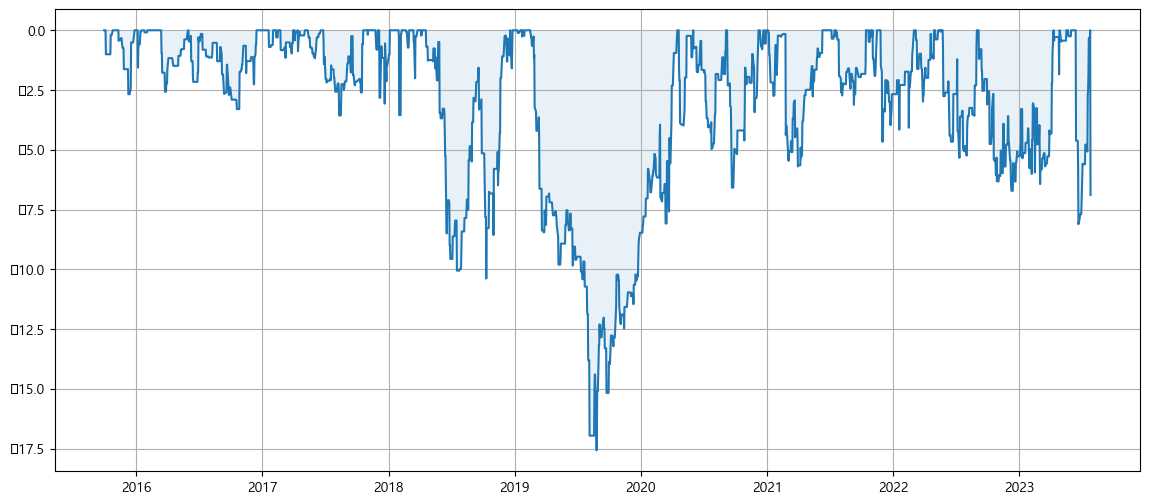

In [11]:
import matplotlib.pyplot as plt

fig =plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,1,1)

ax.plot(df.index,df['DD'])
ax.fill_between(df.index,df['DD'],alpha=0.1)
ax.grid()
plt.show()

In [12]:
'''addition of market timing Strategy

market timing St : 
buy : when the market grows.
(when the price is higher than MA10)
sell : when the market goes down'''
df['MA10']=df['closing price'].rolling(window=10).mean()
df.head(n=10)

,starting price,high price,low price,closing price,volume,volatility,previous price,target price,Return,cumulative return,previous high,DD,MA10
date,,,,,,,,,,,,,
2015-10-01,10830,10830,10760,10760,30032,70,NaN,NaN,1.000000,1.000000,1.0,0.000000,NaN
2015-10-02,10800,10825,10800,10810,60029,25,70.0,10835.0,1.000000,1.000000,1.0,0.000000,NaN
2015-10-05,10930,10940,10880,10900,40976,60,25.0,10942.5,1.000000,1.000000,1.0,0.000000,NaN
2015-10-06,10920,10950,10840,10840,40252,110,60.0,10950.0,0.989954,0.989954,1.0,-1.004566,NaN
2015-10-07,10760,10760,10600,10600,20248,160,110.0,10815.0,1.000000,0.989954,1.0,-1.004566,NaN
2015-10-08,10660,10680,10430,10500,40068,250,160.0,10740.0,1.000000,0.989954,1.0,-1.004566,NaN
2015-10-12,10500,10500,10470,10475,40071,30,250.0,10625.0,1.000000,0.989954,1.0,-1.004566,NaN
2015-10-13,10520,10520,10420,10420,20026,100,30.0,10535.0,1.000000,0.989954,1.0,-1.004566,NaN
2015-10-14,10415,10450,10370,10370,22141,80,100.0,10465.0,1.000000,0.989954,1.0,-1.004566,NaN


In [13]:
df['buy timing']=df['starting price']>df['MA10'].shift(1)

In [14]:
df['Return2']=np.where((df['buy timing']==1)&(df['high price']>=df['target price']),df['closing price']/df['target price'],1)
df['cumulative return2']=df['Return2'].cumprod()
print(df['cumulative return2'].iloc[-1])

1.3992175673209144


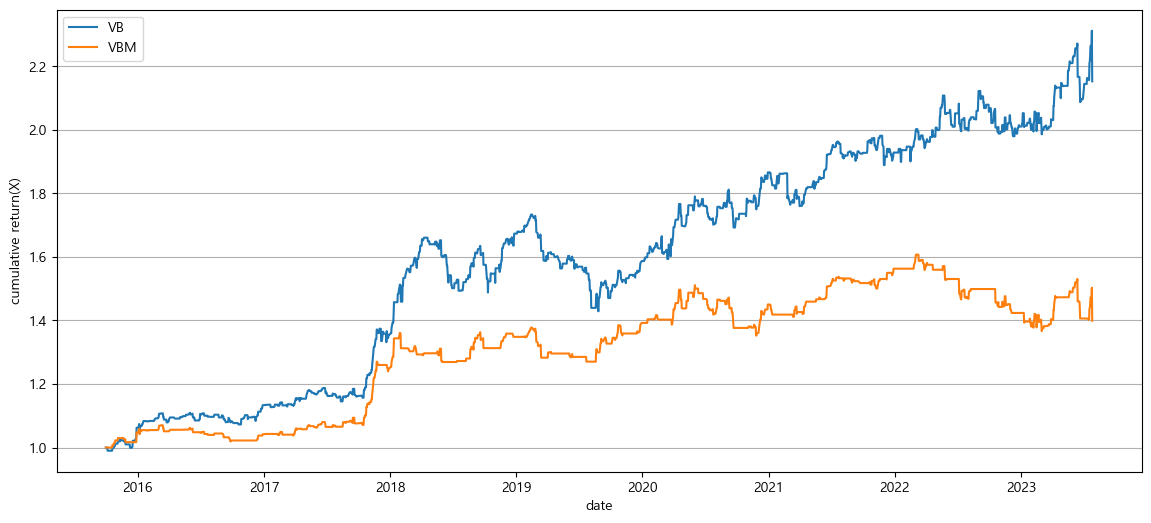

In [15]:
import matplotlib.pyplot as pltt
import platform

if platform.system()=='Darwin':
    plt.rc('font',family='AppleGothic')
else:
    plt.rc('font',family='Malgun Gothic')
    
fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,1,1)
ax.plot(df['cumulative return'],label="VB")
ax.plot(df['cumulative return2'],label="VBM")

plt.xlabel('date')
plt.ylabel('cumulative return(X)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [16]:
df['previous high2']=df['cumulative return2'].cummax()
df['DD2']=(df['cumulative return2']-df['previous high2'])/df['previous high2']*100

In [17]:
# Maximum Drawdown if VBM st
df['DD2'].min()

-14.96603648997409

E:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


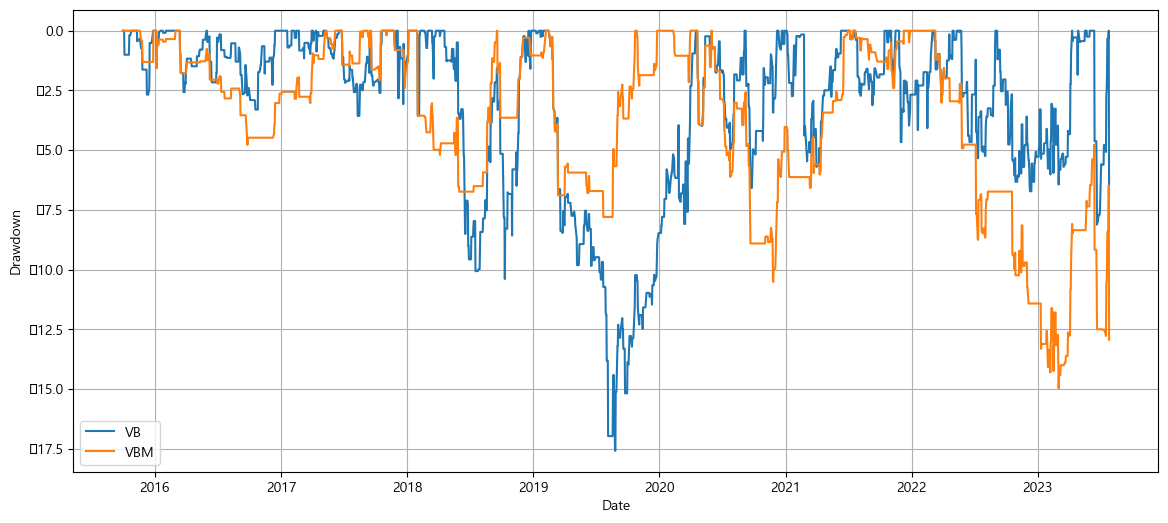

In [18]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,1,1)

ax.plot(df.index, df['DD'], label='VB')
ax.plot(df.index, df['DD2'], label='VBM')

ax.grid()
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend(loc='best')
plt.show()

In [19]:
'''
conclusion:
return(CAGR)
VB(10.29)>VBM(Volatility Breakthrough + timing Strategy)

MDD
VB>VBM
'''

'\nconclusion:\nreturn\nVB>VBM(Volatility Breakthrough + timing Strategy)\nMDD\nVB>VBM\n'